In [ ]:
#Importing the necessary modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot
from keras.utils import to_categorical

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
#Mounting drive and datasets to colab

import json
from google.colab import drive
drive.mount('/content/drive')

jsonFile = '/content/drive/Shareddrives/PanClef2024/dataset/dataset_en_train.json'

jsonData = open (jsonFile, "r")

#Creating a dataframe based on json data file
panDataFrameWhole = json.loads(jsonData.read())





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataframe = pd.DataFrame(panDataFrameWhole, columns = ["id", "text", "category"])

In [ ]:
# selecting rows based on category
criticalDF = dataframe[dataframe['category'] == "CRITICAL"]
conspiracyDF = dataframe[dataframe['category'] == "CONSPIRACY"]

print(criticalDF.head())
print(conspiracyDF.head())

      id                                               text  category
1   1387  “ I ’m deeply concerned that the push to vacci...  CRITICAL
2  13116  2021 : They wanted to know your vaccination st...  CRITICAL
3  11439  Anthony Fauci once again defended brutal Chine...  CRITICAL
4     98  Proof has emerged showing that death from Wuha...  CRITICAL
5   4279  Joe Biden , who told Americans last year , “ Y...  CRITICAL
       id                                               text    category
0    5206  THIS IS MASSIVE Australian Senator Malcolm Rob...  CONSPIRACY
6   11306  " 1861 for a number of black - magick - relate...  CONSPIRACY
10  12217  First RNA - messenger from apoptosis cells and...  CONSPIRACY
11   3321  EXIT COVID - NEXT - RUSSIA IS BAD NARRATIVE - ...  CONSPIRACY
12    867  I believe that 70 to 80 % of We The People sup...  CONSPIRACY


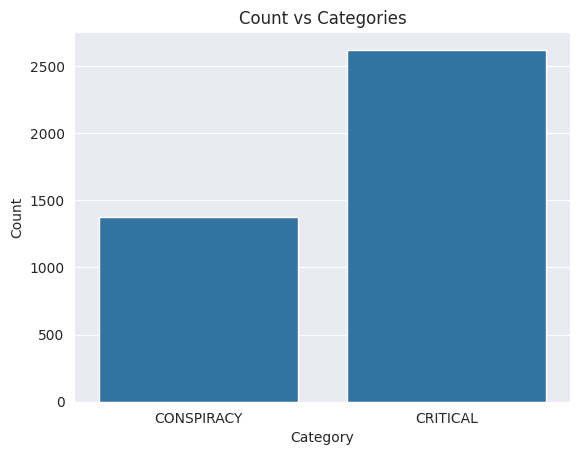

In [ ]:
#Analysing and Preprocessing the Data

#Plotting the data using seaborn module

sns.set_style('darkgrid')

sns.countplot(data=dataframe, x='category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count vs Categories')
plt.show()



In [ ]:
#Data Cleansing

#Checking for missing or NAN values
print('Missing value statistics:')
print(dataframe.isna().sum())
print()
print('Null value statistics:')
print(dataframe.isnull().sum())

Missing value statistics:
id          0
text        0
category    0
dtype: int64

Null value statistics:
id          0
text        0
category    0
dtype: int64


In [ ]:
#Total data available
print("Number of data available: ", end = " ")
print(dataframe.count())

#Types of data available
print("Number of critical data available: ", end = " ")
print(criticalDF.count())

print("Number of conspiracy data available: ", end = " ")
print(conspiracyDF.count())

Number of data available:  id          4000
text        4000
category    4000
dtype: int64
Number of critical data available:  id          2621
text        2621
category    2621
dtype: int64
Number of conspiracy data available:  id          1379
text        1379
category    1379
dtype: int64


In [ ]:
dataframe.head()

,id,text,category
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL
4,98,Proof has emerged showing that death from Wuha...,CRITICAL


In [ ]:
dataframe['cat'] =  dataframe.apply(lambda row: '0' if row['category'] == "CRITICAL" else '1', axis=1)
dataframe.head()

,id,text,category,cat
0,5206,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,1
1,1387,“ I ’m deeply concerned that the push to vacci...,CRITICAL,0
2,13116,2021 : They wanted to know your vaccination st...,CRITICAL,0
3,11439,Anthony Fauci once again defended brutal Chine...,CRITICAL,0
4,98,Proof has emerged showing that death from Wuha...,CRITICAL,0


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'text' is your feature column and 'category' is your label column in the DataFrame.
X = dataframe['text']
y = dataframe['cat']

# Splitting the data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
x_test

2230    The WHO is discussing regulations directly aff...
668     WATCH + SHARE : Megyn Kelly and Robert F. Kenn...
3616    JOIN THE MAGNETEERS AND SAVE LIVES Victims of ...
2363    They kill babies and then hide the reason beca...
142     THIS IS CRAZY Excess death rate is now HIGHER ...
                              ...                        
1118    BQQQQQQQM CHICKEN FROM " COVID " CONTINUED TO ...
3572    Dr. Matthias Desmet : We Can Disrupt The Mass ...
2482    The United States of America is STILL refusing...
643     " JUST IN - Fully vaccinated and " " boosted "...
299     Victim of the nano material antenna . The huma...
Name: text, Length: 800, dtype: object

In [ ]:
pip install keras-nlp --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Su

In [ ]:
import keras_nlp


In [ ]:
model_name = "bert_tiny_en_uncased_sst2"
# Pretrained classifier.
classifier = keras_nlp.models.BertClassifier.from_preset(
    model_name,
    num_classes=2,
    load_weights = True,
    activation='sigmoid'
)

100%|██████████| 145/145 [00:00<00:00, 390kB/s]


100%|██████████| 2.04k/2.04k [00:00<00:00, 2.96MB/s]


100%|██████████| 50.3M/50.3M [00:01<00:00, 30.3MB/s]
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 84 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


100%|██████████| 16.8M/16.8M [00:00<00:00, 19.9MB/s]


100%|██████████| 226k/226k [00:00<00:00, 962kB/s]


In [ ]:
classifier.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    jit_compile=True,
     metrics=["accuracy"],
)
# Access backbone programatically (e.g., to change `trainable`).
classifier.backbone.trainable = False
# Fit again.
classifier.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=32)

100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5625 - loss: 4.2655 - val_accuracy: 0.5125 - val_loss: 2.7420


In [ ]:
classifier.summary()

Preprocessor: "bert_preprocessor_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                     │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "bert_classifier_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 128), (None,      │       4,385,920 │ padding_mask[0][0],        │
│                               │ None, 128)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 128)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │             258 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 4,386,696 (16.73 MB)

 Trainable params: 258 (1.01 KB)

 Non-trainable params: 4,385,920 (16.73 MB)

 Optimizer params: 518 (2.03 KB)

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming 'classifier' is your Keras model
plot_model(classifier, to_file='model_summary.png', show_shapes=True, show_layer_names=True)


InvocationException: Program terminated with status: 1. stderr follows: Error: bad label format <table border="0" cellborder="1" bgcolor="black" cellpadding="10"><tr><td colspan="2" bgcolor="black"><font point-size="16" color="white"><b>bert_backbone</b> (BertBackbone)</font></td></tr><tr><td bgcolor="white"><font point-size="14">Input shape: <b>{'token_ids': (None, None), 'segment_ids': (None, None), 'padding_mask': (None, None)}</b></font></td><td bgcolor="white"><font point-size="14">Output shape: <b>{'sequence_output': (None, None, 128), 'pooled_output': (None, 128)}</b></font></td></tr></table>


In [ ]:
classifier.evaluate(x_test, y_test,batch_size=32)

In [ ]:
classifier.predict(["I ’m deeply concerned that the push to vaccinate these children is nothing more than a dystopian experiment with unknown consequences ."])

In [ ]:
print(x_test)
print(type(x_test))

In [ ]:
trprint(list(x_test)[30])
class_names = ["critical","conspiracy"]
scores = classifier.predict([list(x_test)[30]])
print(scores)
f"{class_names[np.argmax(scores)]} with a { (100 * np.max(scores)).round(2) } percent confidence."

In [ ]:
from sklearn.metrics import matthews_corrcoef

# Make predictions on the test dataset
y_pred = classifier.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Ensure shapes are compatible
if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred_labels)

# Calculate accuracy from MCC (assuming binary classification)
accuracy = (mcc + 1) / 2  # Since MCC ranges from -1 to 1, map it to [0, 1]

print("Matthews Correlation Coefficient (MCC):", mcc)
print("Accuracy:", accuracy)


TEST DATASET


In [ ]:
jsonFile = '/content/drive/Shareddrives/BERTTask/dataset/dataset_en_official_test_nolabels.json'

jsonData = open (jsonFile, "r")

#Creating a dataframe based on json data file
test_df = json.loads(jsonData.read())

In [ ]:
test_dataframe = pd.DataFrame(test_df, columns = ["id", "text"])
test_dataframe.shape

In [ ]:
test_dict = test_dataframe.set_index("id")["text"].to_dict()

# Display the dictionary
print(test_dict)
print(len(test_dict.values()))

In [ ]:
print(test_dict.keys())

In [ ]:
classifier.predict([test_dict['6667']])

In [ ]:
pred_dict={}

In [ ]:
for i in list(test_dict.keys()):
  scores=classifier.predict([test_dict[i]])
  if (scores[0][0]>scores[0][1]):
    pred_dict[i]="CRITICAL"
  else:
    pred_dict[i]="CONSPIRACY"



In [ ]:
print(pred_dict['6667'])

In [ ]:
print(pred_dict)

In [ ]:
pred_dataframe = pd.DataFrame(list(pred_dict.items()), columns=["id", "category"])

# Display the DataFrame
print(pred_dataframe)

In [ ]:

json_file_path = 'predictions_task1.json'
pred_dataframe.to_json(json_file_path, orient='records', lines=True)

print(f"DataFrame has been written to {json_file_path}")


In [ ]:
import pandas as pd

# Assuming pred_dataframe is your DataFrame
pred_dataframe = pd.DataFrame(list(pred_dict.items()), columns=["id", "category"])

# Convert DataFrame to JSON and save to a file
json_file_path = 'predictions1_task1.json'
pred_dataframe.to_json(json_file_path, orient='records',lines=False)

print(f"DataFrame has been written to {json_file_path}")
